# Dynamic Pricing Optimization for E-commerce
## Project Overview
This project aims to optimize the prices of products in an e-commerce store by using dynamic pricing strategies. The prices will be adjusted based on factors like demand, competitor prices, and customer behavior in real-time.

We will use machine learning models to predict the optimal price to maximize profit and market share.


###  Simulated Dataset Creation

In [6]:
import pandas as pd
import numpy as np

# Simulating an e-commerce dataset
np.random.seed(42)

n_products = 1000

data = pd.DataFrame({
    'Product_ID': np.arange(1, n_products + 1),
    'Price': np.random.uniform(10, 100, n_products),
    'Competitor_Price': np.random.uniform(10, 100, n_products),
    'Sales_Volume': np.random.randint(1, 1000, n_products),
    'Customer_Interest': np.random.randint(10, 1000, n_products),
    'Seasonality': np.random.choice(['Low', 'Medium', 'High'], n_products),
    'Inventory_Level': np.random.randint(1, 500, n_products)
})

data.to_csv('ecommerce_data.csv', index=False)

# Load the dataset
data = pd.read_csv('ecommerce_data.csv')
data.head()

,Product_ID,Price,Competitor_Price,Sales_Volume,Customer_Interest,Seasonality,Inventory_Level
0,1,43.708611,26.661964,220,489,High,139
1,2,95.564288,58.771085,903,31,High,344
2,3,75.879455,88.565125,163,358,Medium,305
3,4,63.879264,75.900240,951,735,Low,149
4,5,24.041678,82.590503,220,692,Low,115


### Exploratory Data Analysis (EDA)

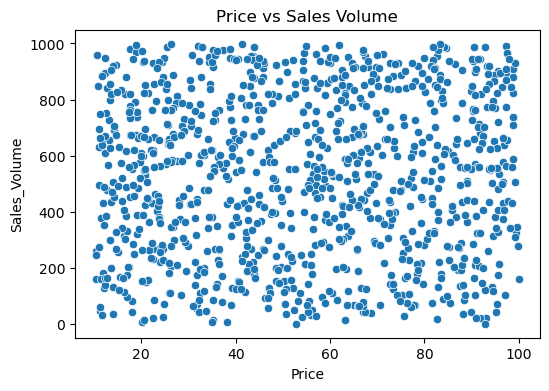

C:\Users\areeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\areeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


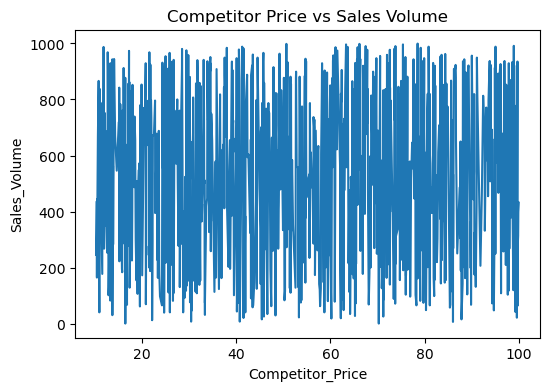

C:\Users\areeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


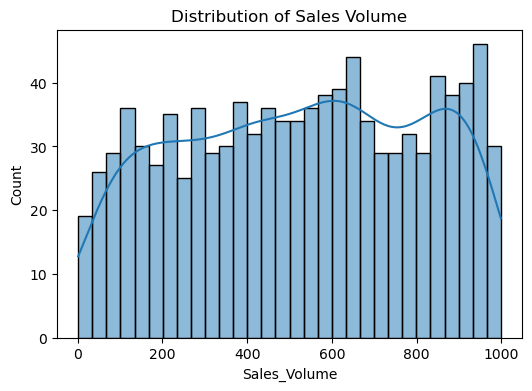

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price vs Sales Volume
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price', y='Sales_Volume', data=data)
plt.title('Price vs Sales Volume')
plt.show()

# Competitor Price vs Sales Volume
plt.figure(figsize=(6, 4))
sns.lineplot(x='Competitor_Price', y='Sales_Volume', data=data)
plt.title('Competitor Price vs Sales Volume')
plt.show()

# Sales Volume distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['Sales_Volume'], bins=30, kde=True)
plt.title('Distribution of Sales Volume')
plt.show()

In [19]:
data.describe()

,Product_ID,Price,Competitor_Price,Sales_Volume,Customer_Interest,Inventory_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,54.123090,55.631557,526.506000,501.439000,256.927000
std,288.819436,26.292363,26.297090,282.269932,285.648317,142.320388
min,1.000000,10.416882,10.289644,1.000000,10.000000,2.000000
25%,250.750000,31.237594,31.696684,283.750000,250.750000,138.750000
50%,500.500000,54.712664,56.686052,543.000000,511.000000,261.500000
75%,750.250000,76.988763,78.441855,772.000000,739.000000,379.250000
max,1000.000000,99.974591,99.947235,999.000000,999.000000,499.000000


### Feature Engineering
Now we will create new features to improve our model.
<br>
**Lag Features:** These capture historical data.<br>
**Rolling Averages:** These smooth out fluctuations.<br>
**Dummy Variables:** Convert categorical variables like Seasonality.<br>

In [25]:
# Lag features
data['Sales_Lag1'] = data['Sales_Volume'].shift(1).fillna(0)

# Rolling average
data['Sales_Rolling_3'] = data['Sales_Volume'].rolling(window=3).mean().fillna(data['Sales_Volume'])

# Convert Seasonality to dummy variables
data = pd.get_dummies(data, columns=['Seasonality'], drop_first=True)

data.head()

,Product_ID,Price,Competitor_Price,Sales_Volume,Customer_Interest,Inventory_Level,Sales_Lag1,Sales_Rolling_3,Seasonality_Low,Seasonality_Medium
0,1,43.708611,26.661964,220,489,139,0.0,220.000000,False,False
1,2,95.564288,58.771085,903,31,344,220.0,903.000000,False,False
2,3,75.879455,88.565125,163,358,305,903.0,428.666667,False,True
3,4,63.879264,75.900240,951,735,149,163.0,672.333333,True,False
4,5,24.041678,82.590503,220,692,115,951.0,444.666667,True,False
